## Import libraries

In [1]:
# We always import libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# configure our plots inside jupyter
%matplotlib inline

### This notebook follows the below framework:

* data exploration
* choosing the right model
* fit the model
* evaluate the model
* improve the model
* save/import the model

In [2]:
# ignore warnings for now sue to some module depreciation issues
import warnings
warnings.filterwarnings("ignore") # you can change "igonre" to "default"

## 1. data exploration

In [3]:
# importing dataset
life_expectancy = pd.read_csv("LifeExpectancy.csv")
life_expectancy.head(10)

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
# check the length of this dataframe
len(life_expectancy)

2938

In [5]:
# check for missing values
life_expectancy.isna().sum()

Unnamed: 0                           0
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [6]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2938 non-null   int64  
 1   country                          2938 non-null   object 
 2   year                             2938 non-null   int64  
 3   status                           2938 non-null   object 
 4   life_expectancy                  2928 non-null   float64
 5   adult_mortality                  2928 non-null   float64
 6   infant_deaths                    2938 non-null   int64  
 7   alcohol                          2744 non-null   float64
 8   percentage_expenditure           2938 non-null   float64
 9   hepatitis_b                      2385 non-null   float64
 10  measles                          2938 non-null   int64  
 11  bmi                              2904 non-null   float64
 12  under_five_deaths   

In [28]:
life_expectancy[:100]

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Argentina,2000,Developing,74.1,137.0,12,7.68,1349.025282,NaN,...,88.0,9.21,83.0,0.1,7669.273916,3757452.0,1.2,1.1,0.764,15.0
96,96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
97,97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
98,98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7


In [7]:
# sort the dataframe by year
life_expectancy_sorted = life_expectancy.sort_values("year")
life_expectancy_sorted[:100]

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
2937,2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8
271,271,Belize,2000,Developing,68.3,196.0,0,4.79,219.023984,76.0,...,91.0,3.98,91.0,0.3,3364.423711,247315.0,3.8,3.7,0.668,11.7
1361,1361,Kazakhstan,2000,Developing,63.9,292.0,9,6.00,112.541157,99.0,...,96.0,4.16,97.0,0.1,1229.958000,14883626.0,2.7,2.7,0.676,12.1
849,849,Equatorial Guinea,2000,Developing,52.7,336.0,3,4.46,14.954513,NaN,...,41.0,2.73,34.0,1.9,172.684910,614323.0,1.7,1.6,0.000,0.0
2424,2424,South Sudan,2000,Developing,48.9,38.0,31,NaN,0.000000,NaN,...,NaN,NaN,NaN,2.7,NaN,67656.0,NaN,NaN,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,1763,Morocco,2000,Developing,68.6,16.0,27,0.45,63.421400,43.0,...,95.0,4.18,95.0,0.1,1332.382358,28849621.0,6.7,6.6,0.519,8.0
656,656,Croatia,2000,Developed,74.7,127.0,0,12.73,649.390987,NaN,...,94.0,7.66,93.0,0.1,4919.628690,4426.0,2.1,2.1,0.739,12.2
1828,1828,Nepal,2000,Developing,62.5,238.0,46,0.08,17.912337,NaN,...,74.0,5.43,74.0,0.1,231.425540,2374911.0,18.5,19.2,0.439,8.9
591,591,Colombia,2000,Developing,71.4,167.0,18,4.66,477.134181,78.0,...,82.0,5.91,79.0,0.1,2472.197831,443958.0,2.6,2.3,0.650,11.3


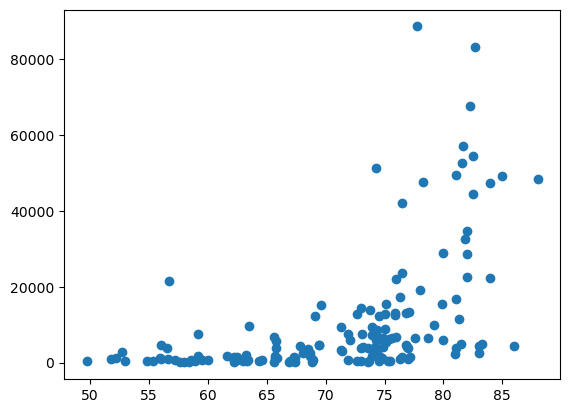

In [41]:
# check scatter plot of target and countries

# Filter the dataframe for the year 2000 and developing countries
filtered_df = life_expectancy[(life_expectancy['year'] == 2012)]

fig, ax = plt.subplots()
ax = ax.scatter(filtered_df["life_expectancy"], filtered_df["gdp"])

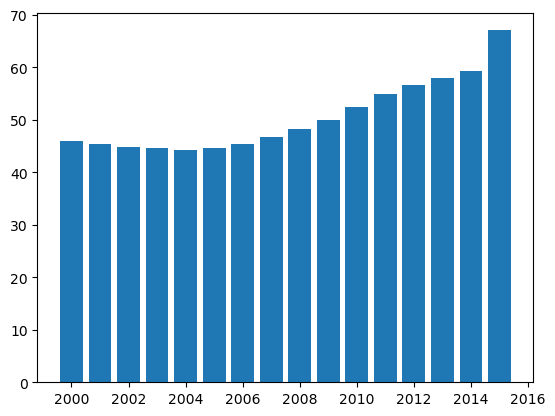

In [45]:
# check life expectancy of zimbabwe over the years

# Filter the dataframe
filtered_df = life_expectancy[(life_expectancy['country'] == "Zimbabwe")]

# plot
fig, ax = plt.subplots()
ax = ax.bar(filtered_df["year"], filtered_df["life_expectancy"])

In [8]:
# check how many countries we have 
countries = list(life_expectancy[(life_expectancy["year"] == 2000)]["country"])
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Côte d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',

In [13]:
# number of countries we have
len(countries)

183

## Modelling

In [49]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()

model.fit(life_expectancy_sorted.drop("life_expectancy", axis=1), life_expectancy_sorted["life_expectancy"])

ValueError: could not convert string to float: 'Zimbabwe'

**convert all strings to values**

In [15]:
# check all columns
life_expectancy.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
year,2015,2014,2013,2012,2011
status,Developing,Developing,Developing,Developing,Developing
life_expectancy,65.0,59.9,59.9,59.5,59.2
adult_mortality,263.0,271.0,268.0,272.0,275.0
infant_deaths,62,64,66,69,71
alcohol,0.01,0.01,0.01,0.01,0.01
percentage_expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
hepatitis_b,65.0,62.0,64.0,67.0,68.0


In [9]:
# drop index column from sorted dataframe
life_expectancy_sorted.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
life_expectancy_sorted.head().T

,2937,271,1361,849,2424
country,Zimbabwe,Belize,Kazakhstan,Equatorial Guinea,South Sudan
year,2000,2000,2000,2000,2000
status,Developing,Developing,Developing,Developing,Developing
life_expectancy,46.0,68.3,63.9,52.7,48.9
adult_mortality,665.0,196.0,292.0,336.0,38.0
infant_deaths,24,0,9,3,31
alcohol,1.68,4.79,6.0,4.46,NaN
percentage_expenditure,0.0,219.023984,112.541157,14.954513,0.0
hepatitis_b,79.0,76.0,99.0,NaN,NaN
measles,1483,0,245,0,0


### convert string objects to categories/numbers

In [41]:
# check missing values
life_expectancy_sorted.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [43]:
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio                    

In [11]:
# print all string values
for label, content in life_expectancy_sorted.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

country
status


In [12]:
# check all strings and turn them into categories
for label, content in life_expectancy_sorted.items():
    if pd.api.types.is_object_dtype(content):
        life_expectancy_sorted[label] = content.astype("category").cat.as_ordered()

In [13]:
# check the new dataframe
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   country                          2938 non-null   category
 1   year                             2938 non-null   int64   
 2   status                           2938 non-null   category
 3   life_expectancy                  2928 non-null   float64 
 4   adult_mortality                  2928 non-null   float64 
 5   infant_deaths                    2938 non-null   int64   
 6   alcohol                          2744 non-null   float64 
 7   percentage_expenditure           2938 non-null   float64 
 8   hepatitis_b                      2385 non-null   float64 
 9   measles                          2938 non-null   int64   
 10  bmi                              2904 non-null   float64 
 11  under_five_deaths                2938 non-null   int64   
 12  polio      

In [14]:
# access the category columns codes
life_expectancy_sorted.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [15]:
# we now have a way to access the numerical values of our former string values
life_expectancy_sorted.country.cat.codes

2937    192
271      16
1361     86
849      54
2424    159
       ... 
2762    182
2233    148
384      24
352      22
0         0
Length: 2938, dtype: int16

In [16]:
# Check missing data
# this is a ratio to length of dataframe
life_expectancy_sorted.isnull().sum()/len(life_expectancy_sorted)

country                            0.000000
year                               0.000000
status                             0.000000
life_expectancy                    0.003404
adult_mortality                    0.003404
infant_deaths                      0.000000
alcohol                            0.066031
percentage_expenditure             0.000000
hepatitis_b                        0.188223
measles                            0.000000
bmi                                0.011572
under_five_deaths                  0.000000
polio                              0.006467
total_expenditure                  0.076923
diphtheria                         0.006467
hiv_aids                           0.000000
gdp                                0.152485
population                         0.221920
thinness__1_19_years               0.011572
thinness_5_9_years                 0.011572
income_composition_of_resources    0.056841
schooling                          0.055480
dtype: float64

### now we fill the missing values

In [17]:
# check null numeric values
for label, content in life_expectancy_sorted.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum():
            print(label)

life_expectancy
adult_mortality
alcohol
hepatitis_b
bmi
polio
total_expenditure
diphtheria
gdp
population
thinness__1_19_years
thinness_5_9_years
income_composition_of_resources
schooling


In [18]:
# check for null numeric values
for label, content in life_expectancy_sorted.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum():
            print(label)

life_expectancy
adult_mortality
alcohol
hepatitis_b
bmi
polio
total_expenditure
diphtheria
gdp
population
thinness__1_19_years
thinness_5_9_years
income_composition_of_resources
schooling


In [19]:
# fill the null numeric values with mean
for label, content in life_expectancy_sorted.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            life_expectancy_sorted[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            life_expectancy_sorted[label] = content.fillna(content.median())

In [90]:
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     2938 non-null   category
 1   year                                        2938 non-null   int64   
 2   status                                      2938 non-null   category
 3   life_expectancy                             2938 non-null   float64 
 4   adult_mortality                             2938 non-null   float64 
 5   infant_deaths                               2938 non-null   int64   
 6   alcohol                                     2938 non-null   float64 
 7   percentage_expenditure                      2938 non-null   float64 
 8   hepatitis_b                                 2938 non-null   float64 
 9   measles                                     2938 non-null   int64   
 10  bmi  

In [20]:
# let's check null values for non numeric data
for label, content in life_expectancy_sorted.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

looks like we don't have any missing values for non numeric data

In [21]:
# Turn categorical values into numbers
for label, content in life_expectancy_sorted.items():
    if not pd.api.types.is_numeric_dtype(content):
        # turn categories into numbers and add + 1 (we don't want negative numbers)
        life_expectancy_sorted[label] = pd.Categorical(content).codes + 1

In [22]:
pd.Categorical(life_expectancy_sorted["country"]).codes

array([192,  16,  86, ...,  24,  22,   0], dtype=int16)

In [92]:
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     2938 non-null   int16  
 1   year                                        2938 non-null   int64  
 2   status                                      2938 non-null   int8   
 3   life_expectancy                             2938 non-null   float64
 4   adult_mortality                             2938 non-null   float64
 5   infant_deaths                               2938 non-null   int64  
 6   alcohol                                     2938 non-null   float64
 7   percentage_expenditure                      2938 non-null   float64
 8   hepatitis_b                                 2938 non-null   float64
 9   measles                                     2938 non-null   int64  
 10  bmi              

In [57]:
# lets see the columns
life_expectancy_sorted.isna().sum()

country                                       0
year                                          0
status                                        0
life_expectancy                               0
adult_mortality                               0
infant_deaths                                 0
alcohol                                       0
percentage_expenditure                        0
hepatitis_b                                   0
measles                                       0
bmi                                           0
under_five_deaths                             0
polio                                         0
total_expenditure                             0
diphtheria                                    0
hiv_aids                                      0
gdp                                           0
population                                    0
thinness__1_19_years                          0
thinness_5_9_years                            0
income_composition_of_resources         

In [58]:
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     2938 non-null   category
 1   year                                        2938 non-null   int64   
 2   status                                      2938 non-null   category
 3   life_expectancy                             2938 non-null   float64 
 4   adult_mortality                             2938 non-null   float64 
 5   infant_deaths                               2938 non-null   int64   
 6   alcohol                                     2938 non-null   float64 
 7   percentage_expenditure                      2938 non-null   float64 
 8   hepatitis_b                                 2938 non-null   float64 
 9   measles                                     2938 non-null   int64   
 10  bmi  

### we no longer have missing values in our data 

In [61]:
# check countries categorical codes
pd.Categorical(life_expectancy_sorted["country"]).codes

array([192,  86,  54, ..., 154,  23,   0], dtype=int16)

In [62]:
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     2938 non-null   category
 1   year                                        2938 non-null   int64   
 2   status                                      2938 non-null   category
 3   life_expectancy                             2938 non-null   float64 
 4   adult_mortality                             2938 non-null   float64 
 5   infant_deaths                               2938 non-null   int64   
 6   alcohol                                     2938 non-null   float64 
 7   percentage_expenditure                      2938 non-null   float64 
 8   hepatitis_b                                 2938 non-null   float64 
 9   measles                                     2938 non-null   int64   
 10  bmi  

In [77]:
life_expectancy_sorted.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,bmi_is_missing,polio_is_missing,total_expenditure_is_missing,diphtheria_is_missing,gdp_is_missing,population_is_missing,thinness__1_19_years_is_missing,thinness_5_9_years_is_missing,income_composition_of_resources_is_missing,schooling_is_missing
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.680,0.000000,79.0,1483,...,False,False,False,False,False,False,False,False,False,False
1361,Kazakhstan,2000,Developing,63.9,292.0,9,6.000,112.541157,99.0,245,...,False,False,False,False,False,False,False,False,False,False
849,Equatorial Guinea,2000,Developing,52.7,336.0,3,4.460,14.954513,92.0,0,...,False,False,False,False,False,False,False,False,False,False
2424,South Sudan,2000,Developing,48.9,38.0,31,3.755,0.000000,92.0,0,...,True,True,True,True,True,False,True,True,False,False
2408,South Africa,2000,Developing,57.3,397.0,51,7.300,45.963808,73.0,1459,...,False,False,False,False,False,False,False,False,False,False


In [83]:
# check categories dtype
list(life_expectancy_sorted.country.dtype.categories[0])

['A', 'f', 'g', 'h', 'a', 'n', 'i', 's', 't', 'a', 'n']

In [64]:
# check the counts of year
life_expectancy_sorted.year.value_counts()

year
2013    193
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2014    183
2015    183
Name: count, dtype: int64

**fit model: attemp 1**

In [23]:
# try to fit the model 

# Instatiate model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(life_expectancy_sorted.drop("life_expectancy", axis=1), life_expectancy_sorted["life_expectancy"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [24]:
# let's test our trained model
model.score(life_expectancy_sorted.drop("life_expectancy", axis=1), life_expectancy_sorted["life_expectancy"])

0.9953771252376061

## split data

In [27]:
# check how many years of data we have 
life_expectancy_sorted.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [30]:
life_expectancy_sorted.year.value_counts()

year
2013    193
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2014    183
2015    183
Name: count, dtype: int64

In [32]:
# looks like we have excess counts of the year 2013
# lets check that out
life_exp_2013 = life_expectancy_sorted[life_expectancy_sorted.year == 2013]
life_exp_2013

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,bmi_is_missing,polio_is_missing,total_expenditure_is_missing,diphtheria_is_missing,gdp_is_missing,population_is_missing,thinness__1_19_years_is_missing,thinness_5_9_years_is_missing,income_composition_of_resources_is_missing,schooling_is_missing
1300,84,2013,2,75.6,136.0,1,3.79,5.457289,93.0,0,...,False,False,False,False,False,False,False,False,False,False
2876,190,2013,2,75.7,129.0,28,4.00,0.000000,59.0,1123,...,False,False,False,False,True,True,False,False,False,False
1766,115,2013,2,55.3,46.0,62,1.16,5.813338,78.0,8,...,False,False,False,False,False,False,False,False,False,False
2603,172,2013,2,67.7,158.0,2,0.01,3.379875,82.0,4,...,False,False,False,False,False,False,False,False,False,False
146,10,2013,2,72.2,121.0,5,2.14,275.651493,93.0,164,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,138,2013,2,81.7,68.0,1,9.33,0.000000,99.0,107,...,False,False,False,False,True,True,False,False,True,True
66,5,2013,2,76.1,133.0,0,8.58,1991.430372,99.0,0,...,False,False,False,False,False,True,False,False,False,False
2812,186,2013,2,76.8,117.0,0,5.82,482.803945,94.0,0,...,False,False,False,False,False,False,False,False,False,False
2699,178,2013,2,65.4,228.0,7,2.93,63.748112,98.0,0,...,False,False,False,False,False,False,False,False,False,False


### Eliminate duplicate rows from 2013

### Split data

In [33]:
# split data into X, y
train_set = life_expectancy_sorted[life_expectancy_sorted.year != 2015]
test_set = life_expectancy_sorted[life_expectancy_sorted.year == 2015]

# ratio of test_set to train_set
len(test_set)/len(train_set)

0.06642468239564428

In [34]:
X_train, y_train = train_set.drop("life_expectancy", axis=1), train_set.life_expectancy
X_test, y_test = test_set.drop("life_expectancy", axis=1), test_set.life_expectancy

In [35]:
# check the shape the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2755, 35), (2755,), (183, 35), (183,))

## Fit Model

* this is the baseline 

In [76]:
life_expectancy_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 2937 to 0
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     2938 non-null   category
 1   year                                        2938 non-null   int64   
 2   status                                      2938 non-null   category
 3   life_expectancy                             2938 non-null   float64 
 4   adult_mortality                             2938 non-null   float64 
 5   infant_deaths                               2938 non-null   int64   
 6   alcohol                                     2938 non-null   float64 
 7   percentage_expenditure                      2938 non-null   float64 
 8   hepatitis_b                                 2938 non-null   float64 
 9   measles                                     2938 non-null   int64   
 10  bmi  

In [36]:
from sklearn.ensemble import RandomForestRegressor

# fit the model
np.random.seed(42)
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
# lets check the score of this model
model.score(X_test, y_test) 

ValueError: Found input variables with inconsistent numbers of samples: [2379, 366]